In [133]:
import pandas as pd
df=pd.read_csv('C:/Users/Abhishek Mukherjee/Documents/police_deaths_538.csv')

In [134]:
df.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [135]:
df.isna().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

In [136]:
tempLst=df['cause_short'].unique()


In [137]:
df.isnull().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

In [138]:
#Due to gunfire:
temp=sum(df['cause_short']=='Gunfire')
print(f'Number of polics deaths due to Gunfire:{temp}')



Number of polics deaths due to Gunfire:12067


In [139]:
#Polics deaths due to different causes:
tempPrime=[]
for i in tempLst:
    temp=sum(df['cause_short']==i)
    tempPrime.append(temp)
    print(f'Number of polics deaths due to {i}:{temp}')
    
    

Number of polics deaths due to Gunfire:12067
Number of polics deaths due to Stabbed:465
Number of polics deaths due to Assault:613
Number of polics deaths due to Fall:197
Number of polics deaths due to Drowned:262
Number of polics deaths due to Structure collapse:23
Number of polics deaths due to Fire:63
Number of polics deaths due to Gunfire (Accidental):604
Number of polics deaths due to Animal related:82
Number of polics deaths due to Duty related illness:169
Number of polics deaths due to Heart attack:977
Number of polics deaths due to Weather/Natural disaster:33
Number of polics deaths due to Accidental:80
Number of polics deaths due to Exposure:14
Number of polics deaths due to Heat exhaustion:61
Number of polics deaths due to Struck by streetcar:68
Number of polics deaths due to Struck by train:254
Number of polics deaths due to Bomb:57
Number of polics deaths due to Poisoned:4
Number of polics deaths due to Train accident:18
Number of polics deaths due to Explosion:58
Number of

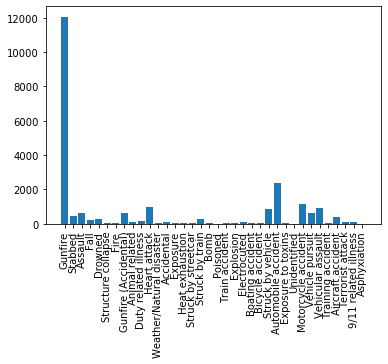

In [140]:
import matplotlib.pyplot as plt
plt.bar(tempLst,tempPrime)
plt.tick_params(axis='x', rotation=90)
plt.show()

Gunfire seems to be the overwhelming single-largest cause of deathe of law-enforcement officers. 

In [141]:
countGunFire=0
countAssault=0
countStabbed=0
for i in range(len(df['cause_short'])):
    
    if df['cause_short'].loc[i]=='Gunfire' and df['canine'].loc[i]==True:
        countGunFire+=1
    if df['cause_short'].loc[i]=='Stabbed' and df['canine'].loc[i]==True:
        countStabbed+=1
    if df['cause_short'].loc[i]=='Assault' and df['canine'].loc[i]==True:
        countAssault+=1    

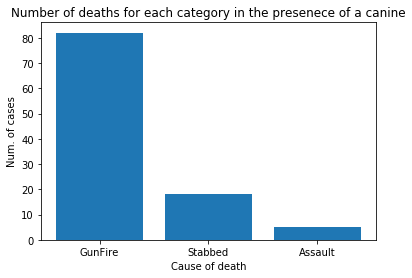

In [142]:
tempLst=[countGunFire,countStabbed,countAssault]
tempNames=['GunFire','Stabbed','Assault']

plt.bar(tempNames,tempLst)
plt.ylabel('Num. of cases')
plt.xlabel('Cause of death')
plt.title('Number of deaths for each category in the presenece of a canine')
plt.show()

In [143]:
tempLst=df['state'].unique()
tempSum=[]
for i in tempLst:
    tempSum.append(sum(df['state']==i))

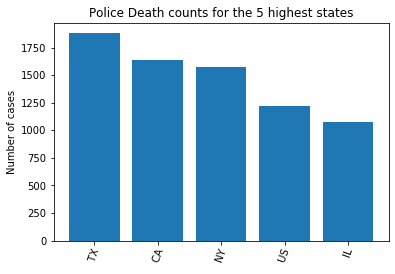

In [144]:
zippedLst=zip(tempSum,tempLst)
tempTup=sorted(zippedLst,reverse=True)

tempCountPrime=list(map(lambda tempCount:tempCount[0], tempTup))
tempNamesPrime=list(map(lambda tempNames:tempNames[1] ,tempTup))

plt.bar(tempNamesPrime[:5],tempCountPrime[:5])
plt.title('Police Death counts for the 5 highest states')
plt.ylabel('Number of cases')
plt.tick_params(axis='x', rotation=70)

In [145]:
df.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [146]:
matPatrn='(\w+)\s'
tempLst=[]
import re
for i in df['person']:
    tempLst.append(re.findall(matPatrn,i)[0])
    

In [147]:
matDict=dict()

for i in tempLst:
    if i not in matDict.keys():
        matDict.update({i:1})
    else:
        matDict[i]+=1

In [148]:
sortedCats=sorted(matDict.items(),key=lambda x:x[1],reverse=True)

In [149]:
tempNames=list(map(lambda tempCounts:tempCounts[0],sortedCats))

In [150]:
tempCounts=list(map(lambda tempNames:tempNames[1],sortedCats))

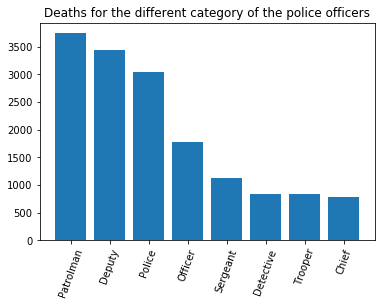

In [151]:
plt.bar(tempNames[:8],tempCounts[:8])
plt.title('Deaths for the different category of the police officers')
plt.tick_params(axis='x',rotation=70)
plt.show()

In [152]:
dateDict=dict()

for i in df['year']:
    if i not in dateDict:
        dateDict.update({i:1})
    else:
        dateDict[i]+=1
    

Text(0.5, 0, 'Year')

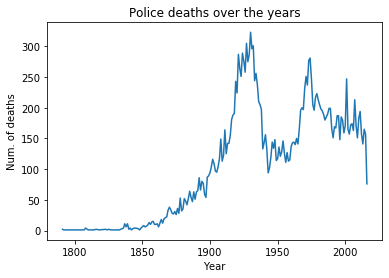

In [153]:
plt.plot(list(dateDict.keys()),list(dateDict.values()))
plt.title('Police deaths over the years')
plt.ylabel('Num. of deaths')
plt.xlabel('Year')

There is a structural change in the mean of the process over time. The process dictating the deaths over time seems a bit similar to a self initiating process.A spike or an event is generally closely followed by more such events. 

In [154]:
matPatrn='\w+\s(\w+\s\w+\s\w+\s\w+\s\w+\s\w+)|\w+\s(\w+\s\w+\s\w+\s\w+\s\w+)|\w+\s(\w+\s\w+\s\w+\s\w+)|\w+\s(\w+\s\w+\s\w+)\s'
tempLst=[]
tempPrime=[]
import re
for i in df['dept_name']:
    tempLst=(re.findall(matPatrn,i))
    if tempLst!=[]:
        for j in tempLst[0]:
            if j!='' or j!= '':
                if j=='York City Police Department':
                    tempPrime.append('New York City Police Department')
                else:
                    tempPrime.append(j)
            
        tempLst=[]

In [155]:
deptDict=dict()

for i in tempPrime:
    if i not in deptDict:
        deptDict.update({i:1})
    else:
        deptDict[i]+=1
        
sortedDict=sorted(deptDict.items(),key=lambda x:x[1],reverse=True)

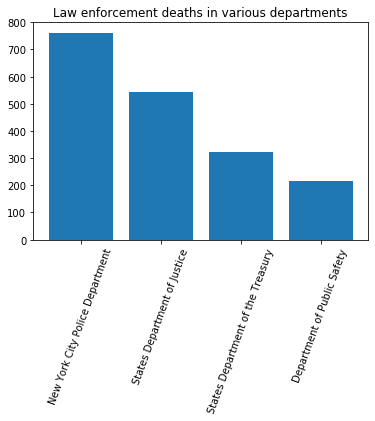

In [156]:
tempKeys=list(map(lambda temp:temp[0],sortedDict))
tempVals=list(map(lambda temp:temp[1],sortedDict))

plt.bar(tempKeys[:4],tempVals[:4])
plt.title('Law enforcement deaths in various departments')
plt.tick_params(axis='x',rotation=70)
plt.show()

In [157]:
#Police killings 
import pandas as pd
df1=pd.read_csv('C:/Users/Abhishek Mukherjee/Downloads/police_killings.csv')

In [158]:
df1.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,Unknown race,NaN,31/12/2019,7239-7411 I-40,Memphis,AR,38103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
dropLst=['ID', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65']

df1=df1.drop(dropLst,axis=1)

In [160]:
df1.isna().sum()

Victim's name                                                                                                                                                                  244
Victim's age                                                                                                                                                                   311
Victim's gender                                                                                                                                                                252
Victim's race                                                                                                                                                                  244
URL of image of victim                                                                                                                                                        3707
Date of Incident (month/day/year)                                                                        

In [161]:
df1.dropna(inplace=True)

In [162]:
df1.isna().sum()

Victim's name                                                                                                                                                                 0
Victim's age                                                                                                                                                                  0
Victim's gender                                                                                                                                                               0
Victim's race                                                                                                                                                                 0
URL of image of victim                                                                                                                                                        0
Date of Incident (month/day/year)                                                                                       

In [163]:
df1['Off-Duty Killing?'].unique()

array(['Off-Duty'], dtype=object)

In [164]:
df1.dropna(subset=['Victim\'s age'],inplace=True)
sumAge=[]
count=0
for i in range(len(df1['Victim\'s age'])):
    if df1['Victim\'s age'].iloc[i]!='Unknown' and df1['Victim\'s age'].iloc[i]!='40s':
        sumAge.append(int(df1['Victim\'s age'].iloc[i]))
        count+=1
        
        

In [165]:
temp=sum(sumAge)/count
print(f'Mean age of victims killed:{temp}')

Mean age of victims killed:27.25


In [184]:
ageGender={'Male':0,'Female':0}
tempLst=['Black','White','Asian','Hispanic','Pacific Islander','Native American']

#census number sourced from wiki
censusPopulationRace={'Black':1243471,'White':26735714,'Asian':209128,
                      'Hispanic':52000000,'Pacific Islander':58437,'Native American':685150}

ageRace={'Black':0,'White':0,'Asian':0,'Hispanic':0,'Pacific Islander':0,'Native American':0}

numRace=ageRace.copy()
numAge=ageRace.copy()
justChargesDict=ageRace.copy()
temp1=ageRace.copy()
temp2=ageRace.copy()
temp3=ageRace.copy()
temp4=ageRace.copy()
offDutyDict=ageRace.copy()
offDutyAgeDict=ageRace.copy()

armedDict={'Allegedly Armed':temp1,'Vehicle':temp2,'Unclear':temp3, 'Unarmed':temp4}
mentalDict=ageRace.copy()
DrugAbuseDict=ageRace.copy()

countMale=0
countFemale=0
for i in range(len(df1['Victim\'s age'])):
    
    if df1['Victim\'s age'].iloc[i]!='Unknown' and df1['Victim\'s age'].iloc[i]!='40s':
        if df1['Victim\'s gender'].iloc[i]=='Male':
            ageGender['Male']+=int(df1['Victim\'s age'].iloc[i])
            countMale+=1
        if df1['Victim\'s gender'].iloc[i]=='Female':
            ageGender['Female']+=int(df1['Victim\'s age'].iloc[i])
            countFemale+=1     
        if df1['Victim\'s race'].iloc[i] in tempLst:
            ageRace[df1['Victim\'s race'].iloc[i]]+=int(df1['Victim\'s age'].iloc[i])
            numAge[df1['Victim\'s race'].iloc[i]]+=1
            
            
    if df1['Victim\'s race'].iloc[i] in tempLst:       
        numRace[df1['Victim\'s race'].iloc[i]]+=1
        if isinstance(df1['Official disposition of death (justified or other)'].iloc[i],str):
            if 'Justified' in df1['Official disposition of death (justified or other)'].iloc[i]:
                justChargesDict[df1['Victim\'s race'].iloc[i]]+=1
        if isinstance(df1['Symptoms of mental illness?'].iloc[i],str):
            
            if df1['Symptoms of mental illness?'].iloc[i]=='Yes':
                mentalDict[df1['Victim\'s race'].iloc[i]]+=1
            if df1['Symptoms of mental illness?'].iloc[i]=='Drug or alcohol use':
                DrugAbuseDict[df1['Victim\'s race'].iloc[i]]+=1
        
        #For distribution of armed/unarmed/vehicle condition of victims 
        #over the different races
        armedDict[df1['Unarmed'].iloc[i]][df1['Victim\'s race'].iloc[i]]+=1 
        
        #For the distribution of races in off-duty killing
        if df1['Off-Duty Killing?'].iloc[i]=='Off-Duty':
            offDutyDict[df1['Victim\'s race'].iloc[i]]+=1
            
        
        
                

{'Black': 0, 'White': 1, 'Asian': 0, 'Hispanic': 0, 'Pacific Islander': 0, 'Native American': 0}


In [178]:
#Average age gender wise:
temp=ageGender['Male']/countMale
print(f'Average age of Male victims:{temp}')
temp=ageGender['Female']/countFemale
print(f'Average age of Female victims:{temp}')

Average age of Male victims:27.11111111111111
Average age of Female victims:28.5


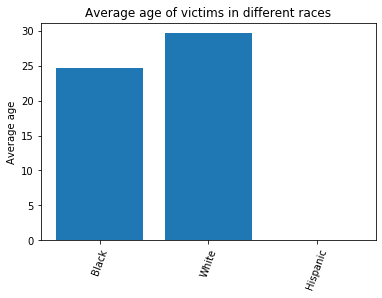

In [179]:
tempVals=list(numRace.values())
tempKeys=list(numRace.keys())

temp=tempVals.count(0)

for i in range(temp):
    tempTilda=tempVals.index(0)
    tempVals.pop(tempTilda)
    tempKeys.pop(tempTilda)

tempLst=list(map(lambda temp,tempPrime:temp/tempPrime,list(ageRace.values()),tempVals))

plt.bar(tempKeys,tempLst)
plt.tick_params(axis='x',rotation=70)
plt.title('Average age of victims in different races')
plt.ylabel('Average age')
plt.show()

tempKeys=[]
tempVals=[]
tempPrime=[]
tempLst=[]

In [188]:
df1['Symptoms of mental illness?'].value_counts()

No                     14
Unknown                 4
Yes                     1
Drug or alcohol use     1
Name: Symptoms of mental illness?, dtype: int64

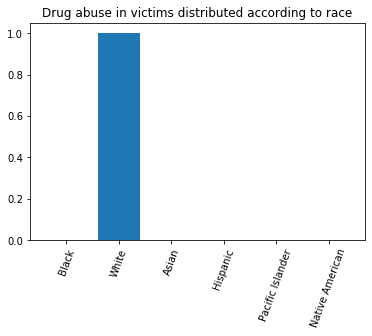

In [181]:
#'Drug abuse' in victims:
import matplotlib.pyplot as plt
plt.bar(list(DrugAbuseDict.keys()),list(DrugAbuseDict.values()))
plt.title('Drug abuse in victims distributed according to race')
plt.tick_params(axis='x',rotation=70)
plt.show()

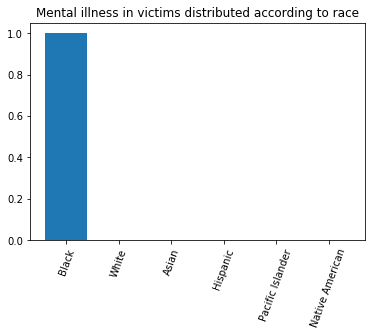

In [182]:
#'Mental illness' in victims:

plt.bar(list(mentalDict.keys()),list(mentalDict.values()))
plt.title('Mental illness in victims distributed according to race')
plt.tick_params(axis='x',rotation=70)
plt.show()

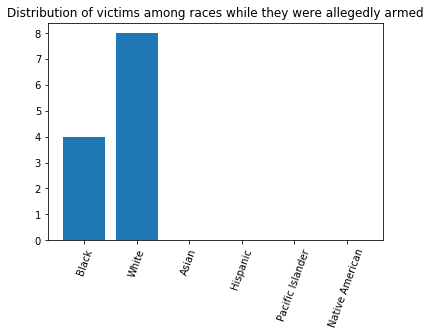

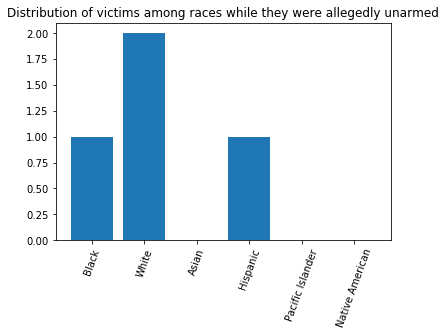

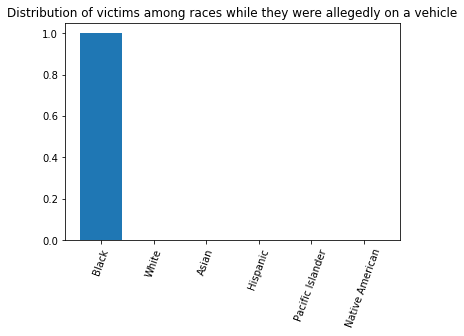

In [183]:
#Allegedly armed
keys=list(armedDict['Allegedly Armed'].keys())
vals=list(armedDict['Allegedly Armed'].values())

plt.bar(keys,vals)
plt.tick_params(axis='x',rotation=70)
plt.title('Distribution of victims among races while they were allegedly armed')
plt.show()

#Allegedly Unarmed
keys=list(armedDict['Unarmed'].keys())
vals=list(armedDict['Unarmed'].values())

plt.figure()
plt.bar(keys,vals)
plt.title('Distribution of victims among races while they were allegedly unarmed')
plt.tick_params(axis='x',rotation=70)
plt.show()


#On a vehicle:
keys=list(armedDict['Vehicle'].keys())
vals=list(armedDict['Vehicle'].values())

plt.figure()
plt.bar(keys,vals)
plt.title('Distribution of victims among races while they were allegedly on a vehicle')
plt.tick_params(axis='x',rotation=70)
plt.show()

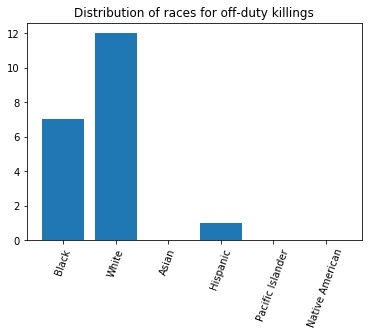

In [37]:
#Off-duty killings: 
keys=offDutyDict.keys()
values=offDutyDict.values()

plt.bar(keys,values)
plt.title('Distribution of races for off-duty killings')
plt.tick_params(axis='x',rotation=70)
plt.show()

In [80]:
df1['Cause of death'].unique()

array(['Gunshot', 'Gunshot, Taser', 'Physical Restraint', 'Taser',
       'Beaten/Bludgeoned with instrument', 'Beaten', 'Vehicle',
       'Asphyxiated', 'Other', 'Gunshot, Beanbag Gun',
       'Gunshot, Police Dog', 'Gunshot, Bean Bag Gun',
       'Gunshot, Pepper Spray', 'Bean bag', 'Gunshot, Taser, Baton',
       'Gunshot, Taser, Beanbag Shotgun', 'Pepper Spray',
       'Gunshot, Unspecified Less Lethal Weapon', 'Physical restraint',
       'Taser, Baton', 'Bomb', 'Taser, Physical Restraint',
       'Baton, Pepper Spray, Physical Restraint', 'Gunshot, Vehicle',
       'Gunshot, Stabbed', 'Gunshot, Taser, Pepper spray',
       'Taser, Pepper Spray, Beaten', 'Taser, Beaten',
       'Taser, Pepper spray, beaten', 'Tasered', nan], dtype=object)

In [81]:

specialCats=['Gunshot, Police Dog','Gunshot, Pepper Spray']

tempLst=['Black','White','Asian','Hispanic','Pacific Islander','Native American']

physicalRestraint=['Physical Restraint','Physical restraint','Baton, Pepper Spray,Physical Restraint',
                   'Taser, Physical Restraint','Taser, Pepper spray, beaten','Taser, Beaten', 'Taser, Physical Restraint']

gunshot=['Gunshot', 'Gunshot, Taser','Taser','Gunshot, Beanbag Gun','Gunshot, Taser, Baton',
         'Gunshot, Taser,Beanbag Shotgun','Gunshot, Unspecified Less Lethal Weapon',
        'Gunshot, Vehicle','Gunshot, Vehicle',
        'Gunshot, Stabbed','Gunshot, Taser, Pepper spray','Taser, Beaten']
         
pepperSpray=['Pepper Spray']
taser=['Taser, Baton','Taser, Pepper Spray, Beaten','Tasered']

bomb=['Bomb']


temp={'Black':0,'White':0,'Asian':0,'Hispanic':0,'Pacific Islander':0,'Native American':0}


temp1=temp.copy()
temp2=temp.copy()
temp3=temp.copy()
temp4=temp.copy()
temp5=temp.copy()
temp6=temp.copy()
temp7=temp.copy()
temp8=temp.copy()

finalCatgrys={'Gunshot, Police Dog':temp1,'Gunshot, Pepper Spray':temp2,'Bean bag':temp3,
              'physicalRestraint':temp4,'Gunshot':temp5,'pepperSpray':temp6,'Taser':temp7,'Bomb':temp8}


#'if' instead of 'elif' to get all categories
for i in range(len(df1['Cause of death'])):
    if df1['Victim\'s race'].iloc[i] in tempLst:
        if df1['Cause of death'].iloc[i] in specialCats: 
            finalCatgrys[df1['Cause of death'].iloc[i]][df1['Victim\'s race'].iloc[i]]+=1
        if df1['Cause of death'].iloc[i] in physicalRestraint:
            finalCatgrys['physicalRestraint'][df1['Victim\'s race'].iloc[i]]+=1
        if df1['Cause of death'].iloc[i] in gunshot:
            finalCatgrys['Gunshot'][df1['Victim\'s race'].iloc[i]]+=1
        if df1['Cause of death'].iloc[i] in pepperSpray:
            finalCatgrys['pepperSpray'][df1['Victim\'s race'].iloc[i]]+=1
        if df1['Cause of death'].iloc[i] in taser:
            finalCatgrys['Taser'][df1['Victim\'s race'].iloc[i]]+=1
        if df1['Cause of death'].iloc[i] in bomb:
            finalCatgrys['Bomb'][df1['Victim\'s race'].iloc[i]]+=1
        
        
        
        
        
    

In [88]:
finalCatgrys

{'Gunshot, Police Dog': {'Black': 2,
  'White': 2,
  'Asian': 0,
  'Hispanic': 1,
  'Pacific Islander': 0,
  'Native American': 0},
 'Gunshot, Pepper Spray': {'Black': 0,
  'White': 1,
  'Asian': 0,
  'Hispanic': 3,
  'Pacific Islander': 0,
  'Native American': 0},
 'Bean bag': {'Black': 0,
  'White': 0,
  'Asian': 0,
  'Hispanic': 0,
  'Pacific Islander': 0,
  'Native American': 0},
 'physicalRestraint': {'Black': 11,
  'White': 6,
  'Asian': 2,
  'Hispanic': 3,
  'Pacific Islander': 1,
  'Native American': 0},
 'Gunshot': {'Black': 1904,
  'White': 3335,
  'Asian': 115,
  'Hispanic': 1305,
  'Pacific Islander': 41,
  'Native American': 111},
 'pepperSpray': {'Black': 1,
  'White': 2,
  'Asian': 0,
  'Hispanic': 1,
  'Pacific Islander': 0,
  'Native American': 0},
 'Taser': {'Black': 1,
  'White': 1,
  'Asian': 0,
  'Hispanic': 0,
  'Pacific Islander': 0,
  'Native American': 0},
 'Bomb': {'Black': 1,
  'White': 0,
  'Asian': 0,
  'Hispanic': 0,
  'Pacific Islander': 0,
  'Native Amer

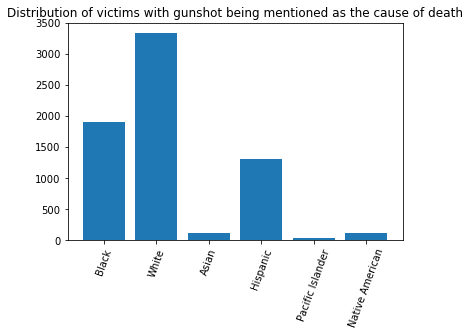

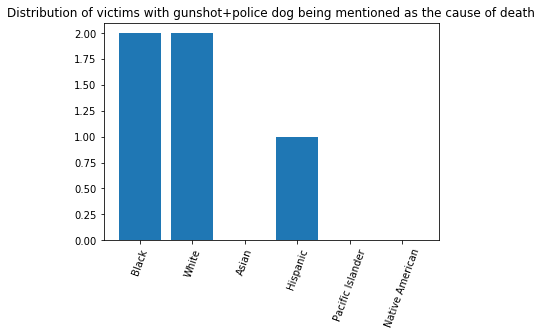

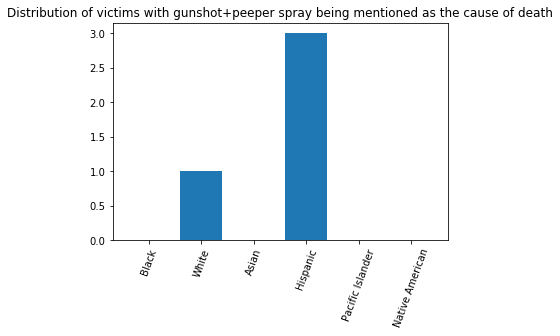

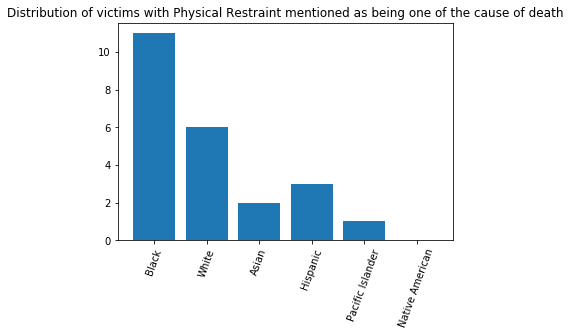

In [89]:
#For Gunshot: 
keys=finalCatgrys['Gunshot'].keys()
values=finalCatgrys['Gunshot'].values()

plt.bar(keys,values)
plt.title('Distribution of victims with gunshot being mentioned as the cause of death')
plt.tick_params(axis='x',rotation=70)
plt.show()


#For Gunshot+police dog:
keys=finalCatgrys['Gunshot, Police Dog'].keys()
values=finalCatgrys['Gunshot, Police Dog'].values()

plt.figure()
plt.bar(keys,values)
plt.title('Distribution of victims with gunshot+police dog being mentioned as the cause of death')
plt.tick_params(axis='x',rotation=70)
plt.show()


#For Gunshot+pepper spray:
keys=finalCatgrys['Gunshot, Pepper Spray'].keys()
values=finalCatgrys['Gunshot, Pepper Spray'].values()

plt.figure()
plt.bar(keys,values)
plt.title('Distribution of victims with gunshot+peeper spray being mentioned as the cause of death')
plt.tick_params(axis='x',rotation=70)
plt.show()


#For Physical restraint:
keys=finalCatgrys['physicalRestraint'].keys()
values=finalCatgrys['physicalRestraint'].values()

plt.figure()
plt.bar(keys,values)
plt.title('Distribution of victims with Physical Restraint mentioned as being one of the cause of death')
plt.tick_params(axis='x',rotation=70)
plt.show()


